# Notebook de exploração

Link para os dados no Kaggle: https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club

A ideia desse notebook é explorar o que temos nos dados, verificamos como podemos contar algumas histórias com os dados e, provavelmente, gerará um post no Medium. Basta esperar :) 

## 0. Pacotes úteis inicialmente

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

---

Setando os diretórios que iremos trazer e exportar os dados:

In [2]:
data_path = '../data/'
output_path = '../output/'

dirs = os.listdir(data_path)

for file in dirs:
    print(file)

tb_players.csv
tb_medalha.csv
tb_lobby_stats_player.csv
tb_players_medalha.csv


---

Verificamos que os dados que temos são os acima. Agora vamos baixar um por um. Como a preguiça de escrever um loop nesse momento é maior que tudo, vamos manualmente baixar de  um por um.

## 1. Baixando os dados

In [3]:
players = pd.read_csv(filepath_or_buffer = data_path + 'tb_players.csv')
medalha = pd.read_csv(filepath_or_buffer = data_path + 'tb_medalha.csv')
stats_players = pd.read_csv(filepath_or_buffer = data_path + 'tb_lobby_stats_player.csv')
players_medalha = pd.read_csv(filepath_or_buffer = data_path + 'tb_players_medalha.csv')

## 2. Explorando cada um dos datasets

### 2.1. Players

Dados cadastrais dos jogadores. Do kaggle temos os seguintes significados para essas variáveis: 

1. idPlayer: ID
2. flFacebook: Possui vínculo da conta da GC com o Facebook (0 ou 1)
3. flTwitter: Possui vínculo da conta da GC com o Twitter (0 ou 1)
4. flTwitter: Possui vínculo da conta da GC com a Twitch (0 ou 1)
5. descCountry: País de origem do jogador
6. dtBirth: Data de aniversário
7. dtRegistration: Data de registro na plataforma da GC

In [4]:
players.head()

,idPlayer,flFacebook,flTwitter,flTwitch,descCountry,dtBirth,dtRegistration
0,1,0,0,0,cl,NaN,2021-03-19 21:31:39
1,2,0,0,0,br,NaN,2020-05-06 19:28:29
2,3,0,0,0,br,NaN,2020-01-28 13:00:38
3,4,0,0,0,br,NaN,2017-05-31 16:13:51
4,5,0,0,0,ar,NaN,2021-02-08 11:57:21


In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idPlayer        2716 non-null   int64 
 1   flFacebook      2716 non-null   int64 
 2   flTwitter       2716 non-null   int64 
 3   flTwitch        2716 non-null   int64 
 4   descCountry     2716 non-null   object
 5   dtBirth         2008 non-null   object
 6   dtRegistration  2716 non-null   object
dtypes: int64(4), object(3)
memory usage: 148.7+ KB


--- 

Vamos criar duas funções para mudar o tipo das variáveis `descCountry` (object -> string) e `dtBirth` e `dtRegistration` (object -> Datetime)

In [6]:
def changeColumnTypeToString(df, cols):
    
    df1 = df.copy()
    
    df1[cols] = df1[cols].astype('str')
    
    return df1

def changeColumnTypeToDatetime(df, cols):
    
    df1 = df.copy()
    
    df1[cols] = df1[cols].astype('datetime64[ns]')
    
    return df1

In [7]:
players1 = players\
.pipe(changeColumnTypeToString, cols = 'descCountry')\
.pipe(changeColumnTypeToDatetime, cols = ['dtBirth', 'dtRegistration'])

players1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   idPlayer        2716 non-null   int64         
 1   flFacebook      2716 non-null   int64         
 2   flTwitter       2716 non-null   int64         
 3   flTwitch        2716 non-null   int64         
 4   descCountry     2716 non-null   object        
 5   dtBirth         2008 non-null   datetime64[ns]
 6   dtRegistration  2716 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 148.7+ KB


---

Agora que temos tipos de colunas um pouco mais adequadas para as futuras análises, vamos fazer alguns gráficos exploratórios:

In [19]:
categorical_cols = ['flFacebook', 'flTwitter', 'flTwitch', 'descCountry']

# def plotCountVariables(df, cols):
    
#     plt.figure(figsize = (18, 4))

#     for i, col in enumerate(cols):
#         ax = plt.subplot(1, len(col), i+1)
#         sns.countplot(data = players1, x = col, ax = ax)
#         ax.set_ylabel('')
#         ax.set_xlabel('')

# _ = plotCountVariables(df = players1, cols = categorical_cols)

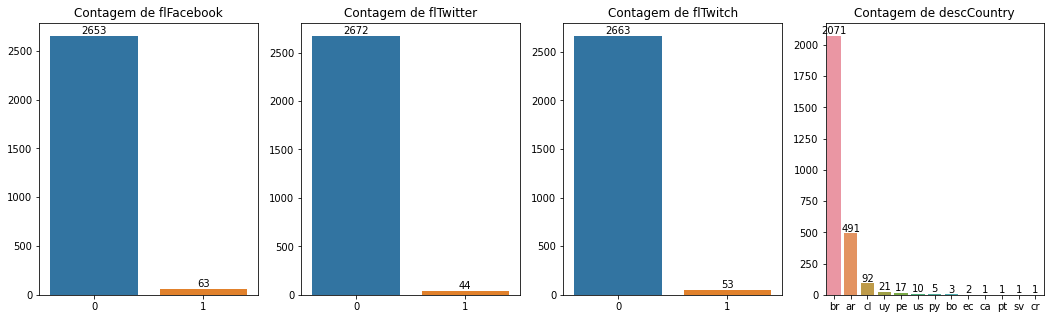

In [34]:
plt.figure(figsize=(18,5))

for i, col in enumerate(categorical_cols):
    ax = plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(data = players1, x = col, ax = ax, order = players[col].value_counts(ascending = False).index)
    ax.set_title(f'Contagem de {col}')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.bar_label(container = ax.containers[0])

--- 

Pode-se notar que a grande maioria dos Players não estão conectados às outras plataformas, Facebook, Twitter e/ou Twitch. 

Quando olhamos os países a quais os Players pertencem, majoritariamente temos o Brasil como sendo o principal, logo em seguida temos a Argentina e o Chile. 